In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram', 'storage', 'screen', 'final_price']].copy()
df.head(3)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0
2,8,256,15.6,789.0


In [3]:
# There's one column with missing values. What is it?
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [4]:
# What's the median (50% percentile) for variable 'ram'?
df.ram.median()

16.0

In [5]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
def shuffle_and_split(data, ratio=[0.6, 0.2, 0.2]):
    n = data.shape[0]
    n_val = int(n * ratio[1])
    n_test = int(n * ratio[2])
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    return df_train, df_val, df_test

In [6]:
# We need to deal with missing values for the column from Q1.
# two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization.
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Which option gives better RMSE?

In [7]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def get_prediction(w0, w, X_train):
    y_pred = w0 + X_train.dot(w)
    return y_pred

Fill with 0

In [8]:
df_train, df_val, df_test = shuffle_and_split(df)
df_train.screen = df_train.screen.fillna(0)
df_val.screen = df_val.screen.fillna(0)
X_train, y_train = df_train.drop('final_price', axis=1), df_train.final_price
X_val, y_val = df_val.drop('final_price', axis=1), df_val.final_price
train_linear_regression(X_train, y_train)
y_pred = get_prediction(*train_linear_regression(X_train, y_train), X_val)
round(np.sqrt(mean_squared_error(np.array(y_val), y_pred)), 2)

597.36

Fill with mean

In [9]:
df_train, df_val, df_test = shuffle_and_split(df)
df_train.screen = df_train.screen.fillna(df_train.final_price.mean())
df_val.screen = df_val.screen.fillna(df_train.final_price.mean())
X_train, y_train = df_train.drop('final_price', axis=1), df_train.final_price
X_val, y_val = df_val.drop('final_price', axis=1), df_val.final_price
train_linear_regression(X_train, y_train)
y_pred = get_prediction(*train_linear_regression(X_train, y_train), X_val)
round(np.sqrt(mean_squared_error(np.array(y_val), y_pred)), 2)

597.57

In [10]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [11]:
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
df.screen = df.screen.fillna(0)
df_train, df_val, df_test = shuffle_and_split(df)
X_train, y_train = df_train.drop('final_price', axis=1), df_train.final_price
X_val, y_val = df_val.drop('final_price', axis=1), df_val.final_price

rs = [0, 0.01, 0.1, 1, 5, 10, 100]
results = {}
for r in rs:
    y_pred = get_prediction(*train_linear_regression_reg(X_train, y_train, r), X_val)
    results[r] = round(np.sqrt(mean_squared_error(np.array(y_val), y_pred)), 2)

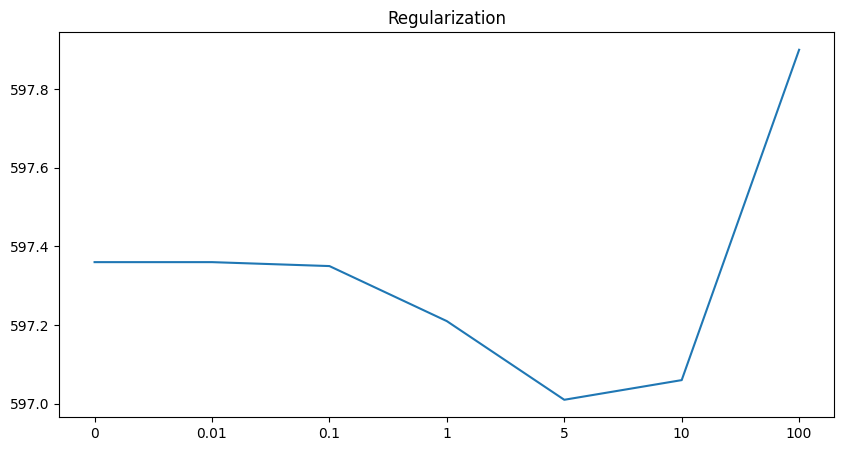

In [12]:
plt.figure(figsize=(10, 5))
_ = sns.lineplot(x=[str(i) for i in results.keys()], y=results.values())
plt.title('Regularization')
plt.show()

In [13]:
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
def shuffle_and_split_with_seed(data, ratio=[0.6, 0.2, 0.2], seed_val=42):
    n = data.shape[0]
    n_val = int(n * ratio[1])
    n_test = int(n * ratio[2])
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed_val)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    return df_train, df_val, df_test

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = {}
for s in seeds:
    df_train, df_val, df_test = shuffle_and_split_with_seed(df, seed_val=s)
    X_train, y_train = df_train.drop('final_price', axis=1), df_train.final_price
    X_val, y_val = df_val.drop('final_price', axis=1), df_val.final_price
    train_linear_regression(X_train, y_train)
    y_pred = get_prediction(*train_linear_regression(X_train, y_train), X_val)
    res = np.sqrt(mean_squared_error(np.array(y_val), y_pred))
    results[s] = res

In [14]:
np.std(list(results.values()))

29.17649125829235

In [15]:
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?
df_train, df_val, df_test = shuffle_and_split_with_seed(df, seed_val=9)
X_train, y_train = df_train.drop('final_price', axis=1), df_train.final_price
X_val, y_val = df_val.drop('final_price', axis=1), df_val.final_price

y_pred = get_prediction(*train_linear_regression_reg(X_train, y_train, r=0.001), X_val)
round(np.sqrt(mean_squared_error(np.array(y_val), y_pred)), 2)

576.1